stars
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
3    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
4    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
5    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

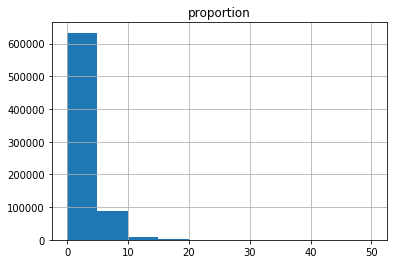

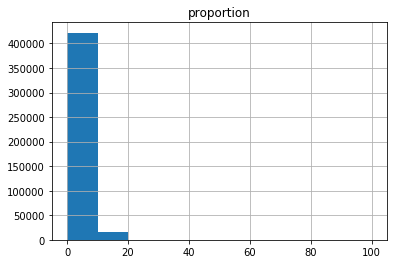

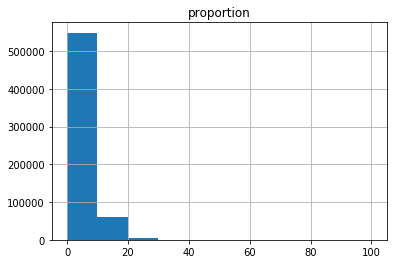

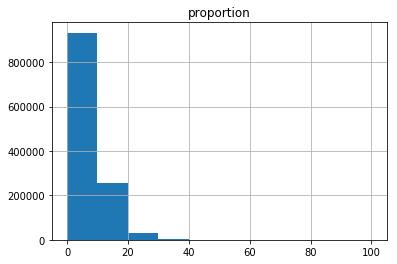

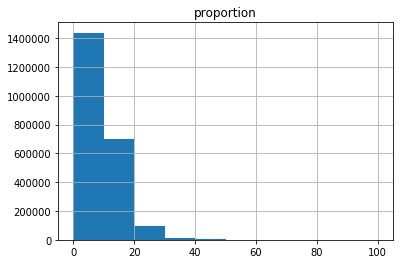

In [171]:
from __future__ import print_function
from __future__ import division
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.types import *
from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import DoubleType, IntegerType, StringType
from ggplot import *
import pandas as pd
from matplotlib import pyplot
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
import numpy as np

schema = StructType([
    StructField("user_id", StringType()),
    StructField("business_id", StringType()),
    StructField("date", StringType()),
    StructField("stars", IntegerType()),
    StructField("review_length", IntegerType()),
    StructField("pos_words", IntegerType()),
    StructField("neg_words", IntegerType()),
    StructField("net_sentiment", IntegerType())
])

spark = SparkSession.builder.master("spark://Yashs-MacBook-Pro-2.local:7077").appName("Yelp Analysis").config("spark.some.config.option", "some-value").getOrCreate()
df = spark.read.csv("file:///Users/yashparikh/Project/yelp_reviews.csv", header=True, schema=schema)
df.createOrReplaceTempView("reviews")

posPropDF = spark.sql("SELECT round((pos_words)/(review_length) * 100, 2) as proportion, stars FROM reviews ORDER BY stars ASC")
posPropVal = posPropDF.select("proportion").rdd.flatMap(lambda x: x).collect()
starsVal = posPropDF.select('stars').rdd.flatMap(lambda x: x).collect()

star1PropDF = spark.sql("SELECT round((pos_words + 1) * 100/(review_length + 1), 2) as proportion FROM reviews WHERE stars = 1")
star1PropVal = star1PropDF.select("proportion").rdd.flatMap(lambda x: x).collect()

plotDF = pd.DataFrame()
plotDF["proportion"] = posPropVal
plotDF["stars"] = starsVal
plotDF.groupby('stars').hist(stacked = True)

